In [47]:
import pandas as pd
import sqlite3
import numpy as np

In [34]:
con = sqlite3.connect('../data/propriedades.db')
df = pd.read_sql('select * from dados', con)

In [35]:
cruz = pd.read_csv('data/cruzain_id_chemb.csv', sep=';')
cruz[['Molecule ChEMBL ID', 'Molecular Weight']]

,Molecule ChEMBL ID,Molecular Weight
0,CHEMBL568312,286.31
1,CHEMBL3347276,425.51
2,CHEMBL3347366,368.40
3,CHEMBL3347331,369.38
4,CHEMBL3347321,461.55
...,...,...
710,CHEMBL4434707,359.91
711,CHEMBL3329515,308.41
712,CHEMBL4283566,627.78
713,CHEMBL4465398,394.35


In [36]:
df

,chembl_id,mw_freebase,alogp,psa,rtb,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles
0,CHEMBL287510,357.454,1.5119,73.83,10.0,NaN,8.79,1.80,0.40,BASE,357.45,2.0,26.0,0.56,357.2052,5.0,3.0,0.0,CN(C)c1ccccc1C(=O)NCCNCC(O)COc1ccccc1
1,CHEMBL285301,320.433,1.7124,70.59,9.0,NaN,8.79,1.96,0.55,BASE,320.43,2.0,23.0,0.61,320.2100,4.0,3.0,0.0,O=C(NCCNCC(O)COc1ccccc1)C1CCCCC1
2,CHEMBL285413,255.314,1.4123,48.95,8.0,NaN,7.42,1.45,1.14,NEUTRAL,255.31,1.0,18.0,0.71,255.1471,5.0,1.0,0.0,COc1ccc(OC)c(CNCC(OC)OC)c1
3,CHEMBL24475,262.349,3.6489,46.53,8.0,9.95,NaN,4.40,4.40,NEUTRAL,262.35,1.0,19.0,0.57,262.1569,3.0,1.0,0.0,CCCC/C=C/C(=O)CCc1ccc(O)c(OC)c1
4,CHEMBL24545,330.468,4.4500,43.37,2.0,NaN,NaN,4.21,4.21,NEUTRAL,330.47,4.0,24.0,0.70,330.2195,3.0,0.0,0.0,CCC(=O)OC1CCC2C3CCC4=CC(=O)CCC4C3CCC12C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084583,CHEMBL4110107,507.538,4.4727,105.57,8.0,11.72,3.32,3.13,3.13,NEUTRAL,507.54,4.0,35.0,0.47,507.1552,7.0,2.0,1.0,Cc1cc(N=S2(=O)CCC2)cc2ncnc(Nc3ccc(F)cc3O[C@H](...
2084584,CHEMBL4110108,337.335,3.0320,76.68,2.0,11.84,5.74,2.11,2.10,NEUTRAL,337.34,5.0,25.0,0.78,337.1063,5.0,1.0,0.0,O=C1OC[C@H](c2ccc3c(c2)OCCO3)N1c1ccc2nc[nH]c2c1
2084585,CHEMBL4110109,338.785,4.1153,41.99,7.0,NaN,7.09,3.66,3.49,NEUTRAL,338.79,2.0,23.0,0.77,338.0997,3.0,1.0,0.0,CC[C@@H](NCCF)c1ccc(Cl)c(C(=O)c2cccnc2)c1F
2084586,CHEMBL4110110,480.968,3.1266,96.81,10.0,NaN,3.97,3.19,3.19,NEUTRAL,480.97,3.0,33.0,0.54,480.1940,7.0,2.0,0.0,CC(C(=O)NCCF)c1ccc(O[C@@H]2CCN(c3ncnc(OCC(C)(C...


In [37]:
df = df.drop(['cx_most_apka','cx_most_bpka','cx_logp','cx_logd'], axis=1)

In [38]:
df = df.drop(df.index[df.molecular_species.isnull()])

In [39]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [64]:
prep_clust = pd.get_dummies(df.query("num_lipinski_ro5_violations == 0"), columns=["molecular_species"])
prep_clust

,chembl_id,mw_freebase,alogp,psa,rtb,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles,molecular_species_ACID,molecular_species_BASE,molecular_species_NEUTRAL,molecular_species_ZWITTERION
0,CHEMBL287510,357.454,1.5119,73.83,10.0,357.45,2.0,26.0,0.56,357.2052,5.0,3.0,0.0,CN(C)c1ccccc1C(=O)NCCNCC(O)COc1ccccc1,0,1,0,0
1,CHEMBL285301,320.433,1.7124,70.59,9.0,320.43,2.0,23.0,0.61,320.2100,4.0,3.0,0.0,O=C(NCCNCC(O)COc1ccccc1)C1CCCCC1,0,1,0,0
2,CHEMBL285413,255.314,1.4123,48.95,8.0,255.31,1.0,18.0,0.71,255.1471,5.0,1.0,0.0,COc1ccc(OC)c(CNCC(OC)OC)c1,0,0,1,0
3,CHEMBL24475,262.349,3.6489,46.53,8.0,262.35,1.0,19.0,0.57,262.1569,3.0,1.0,0.0,CCCC/C=C/C(=O)CCc1ccc(O)c(OC)c1,0,0,1,0
4,CHEMBL24545,330.468,4.4500,43.37,2.0,330.47,4.0,24.0,0.70,330.2195,3.0,0.0,0.0,CCC(=O)OC1CCC2C3CCC4=CC(=O)CCC4C3CCC12C,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084581,CHEMBL4110105,383.456,1.3503,91.79,7.0,383.46,4.0,28.0,0.66,383.2070,9.0,1.0,0.0,Cc1cc(CNc2cc(OC[C@H]3C[C@@H]3c3ccn(C)n3)nn(C)c...,0,0,1,0
2084582,CHEMBL4110106,472.517,3.7759,115.04,6.0,472.52,4.0,33.0,0.56,472.1381,6.0,2.0,0.0,C[C@@H](NC(=O)c1ccc(-c2nc(C3CC3)cnc2N)cc1F)c1c...,0,0,1,0
2084584,CHEMBL4110108,337.335,3.0320,76.68,2.0,337.34,5.0,25.0,0.78,337.1063,5.0,1.0,0.0,O=C1OC[C@H](c2ccc3c(c2)OCCO3)N1c1ccc2nc[nH]c2c1,0,0,1,0
2084585,CHEMBL4110109,338.785,4.1153,41.99,7.0,338.79,2.0,23.0,0.77,338.0997,3.0,1.0,0.0,CC[C@@H](NCCF)c1ccc(Cl)c(C(=O)c2cccnc2)c1F,0,0,1,0


In [41]:
prep_clust = prep_clust.drop(['chembl_id', "canonical_smiles"], axis=1)

In [60]:
df.query("chembl_id in @cruz['Molecule ChEMBL ID']").index

Int64Index([  23639,   24028,   26038,   82157,  100110,  135446,  135447,
             135448,  157726,  158647,
            ...
            1964108, 1964109, 1964110, 1964112, 1964113, 2003987, 2004376,
            2006386, 2062505, 2080458],
           dtype='int64', length=463)

In [63]:
prep_clust

,mw_freebase,alogp,psa,rtb,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,molecular_species_ACID,molecular_species_BASE,molecular_species_NEUTRAL,molecular_species_ZWITTERION
0,357.454,1.5119,73.83,10.0,357.45,2.0,26.0,0.56,357.2052,5.0,3.0,0.0,0,1,0,0
1,320.433,1.7124,70.59,9.0,320.43,2.0,23.0,0.61,320.2100,4.0,3.0,0.0,0,1,0,0
2,255.314,1.4123,48.95,8.0,255.31,1.0,18.0,0.71,255.1471,5.0,1.0,0.0,0,0,1,0
3,262.349,3.6489,46.53,8.0,262.35,1.0,19.0,0.57,262.1569,3.0,1.0,0.0,0,0,1,0
4,330.468,4.4500,43.37,2.0,330.47,4.0,24.0,0.70,330.2195,3.0,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084581,383.456,1.3503,91.79,7.0,383.46,4.0,28.0,0.66,383.2070,9.0,1.0,0.0,0,0,1,0
2084582,472.517,3.7759,115.04,6.0,472.52,4.0,33.0,0.56,472.1381,6.0,2.0,0.0,0,0,1,0
2084584,337.335,3.0320,76.68,2.0,337.34,5.0,25.0,0.78,337.1063,5.0,1.0,0.0,0,0,1,0
2084585,338.785,4.1153,41.99,7.0,338.79,2.0,23.0,0.77,338.0997,3.0,1.0,0.0,0,0,1,0


In [67]:
cruzain = df.query("chembl_id in @cruz['Molecule ChEMBL ID']")
cruzain

In [73]:
clust_cru = pd.get_dummies(cruzain.drop(['chembl_id', "canonical_smiles"], axis=1), columns=["molecular_species"])
clust_cru

,mw_freebase,alogp,psa,rtb,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,molecular_species_ACID,molecular_species_BASE,molecular_species_NEUTRAL,molecular_species_ZWITTERION
23639,322.437,3.7819,42.54,3.0,322.44,3.0,23.0,0.53,322.1252,5.0,0.0,0.0,0,0,1,0
24028,400.507,4.9343,51.77,5.0,400.51,4.0,29.0,0.35,400.1358,6.0,0.0,0.0,0,0,1,0
26038,309.841,2.4016,40.29,6.0,309.84,3.0,21.0,0.81,273.1841,3.0,2.0,0.0,0,1,0,0
82157,383.433,2.0242,98.62,7.0,383.43,3.0,27.0,0.21,383.1052,6.0,2.0,0.0,0,0,1,0
100110,178.239,0.2284,32.26,1.0,178.24,2.0,13.0,0.62,178.1218,4.0,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003987,322.437,3.7819,42.54,3.0,322.44,3.0,23.0,0.53,322.1252,5.0,0.0,0.0,0,0,1,0
2004376,400.507,4.9343,51.77,5.0,400.51,4.0,29.0,0.35,400.1358,6.0,0.0,0.0,0,0,1,0
2006386,309.841,2.4016,40.29,6.0,309.84,3.0,21.0,0.81,273.1841,3.0,2.0,0.0,0,1,0,0
2062505,383.433,2.0242,98.62,7.0,383.43,3.0,27.0,0.21,383.1052,6.0,2.0,0.0,0,0,1,0


In [71]:
ab = preprocessing.normalize(clust_cru, norm='l1')
cluster = KMeans(n_clusters=30, random_state=5)
cluster.fit(ab).labels_

ValueError: could not convert string to float: 'NEUTRAL'

In [44]:
x = preprocessing.normalize(prep_clust, norm='l1')
cluster = KMeans(n_clusters=30, random_state=5)
cluster.fit(x).labels_

array([ 7,  7, 15, ..., 22, 27, 15], dtype=int32)

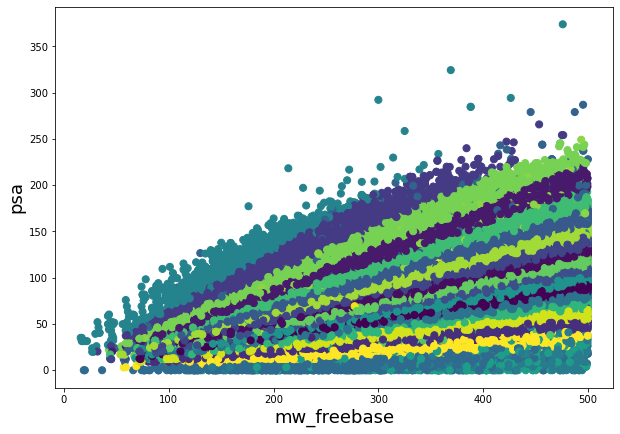

In [45]:
plt.figure(figsize=(10,7))
plt.scatter(x=prep_clust[['mw_freebase']], y=prep_clust.psa, c=cluster.fit(x).labels_, s=50)
plt.xlabel('mw_freebase', fontsize=18)
plt.ylabel('psa', fontsize=18)
plt.show()

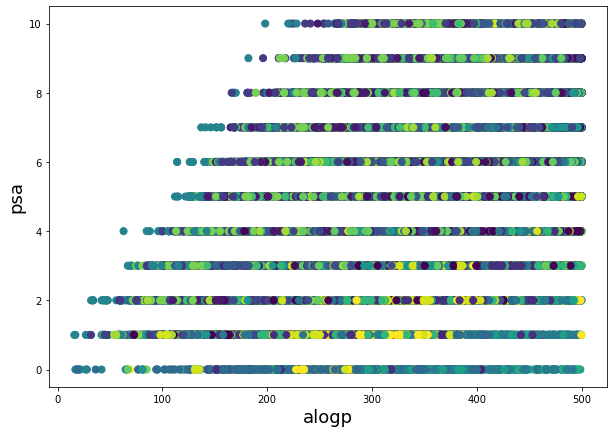

In [69]:
plt.figure(figsize=(10,7))
plt.scatter(x=prep_clust.mw_freebase, y=prep_clust.hba_lipinski, c=cluster.fit(x).labels_, s=50)
plt.xlabel('alogp', fontsize=18)
plt.ylabel('psa', fontsize=18)
plt.show()

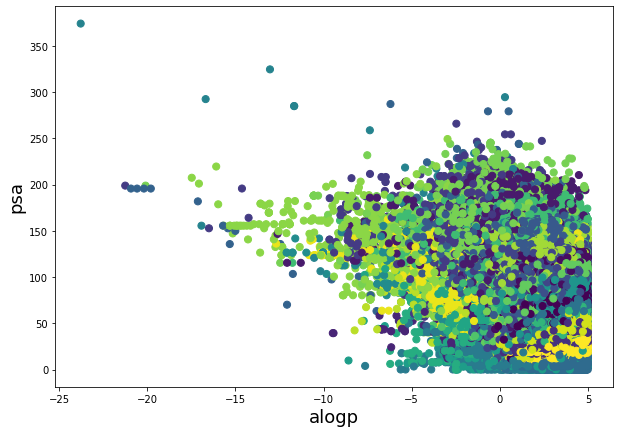

In [66]:
plt.figure(figsize=(10,7))
plt.scatter(x=prep_clust.alogp, y=prep_clust.psa, c=cluster.fit(x).labels_, s=50)
plt.xlabel('alogp', fontsize=18)
plt.ylabel('psa', fontsize=18)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

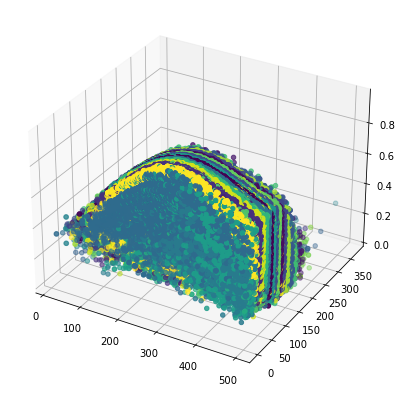

In [51]:
plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
#zline = np.linspace(0, 15, 1000)
#xline = np.sin(zline)
#yline = np.cos(zline)
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
ax.scatter3D(prep_clust.mw_freebase, prep_clust.psa, prep_clust.qed_weighted, c=cluster.fit(x).labels_);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

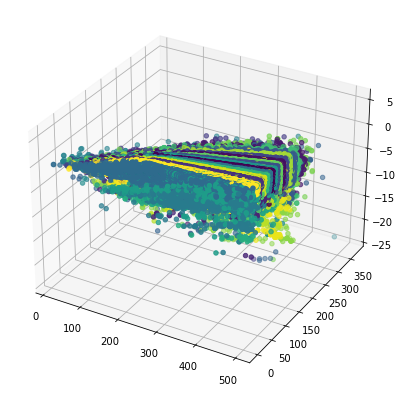

In [72]:
plt.figure(figsize=(10,7))
grp = plt.axes(projection='3d')
# Data for a three-dimensional line
#zline = np.linspace(0, 15, 1000)
#xline = np.sin(zline)
#yline = np.cos(zline)
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
grp.scatter3D(prep_clust.mw_freebase, prep_clust.psa, prep_clust.alogp, c=cluster.fit(x).labels_);
plt.show

In [ ]:
sns.pairplot(prep_clust[['mw_freebase', 'psa', 'grupos_cluster_knn']], hue='grupos_cluster_knn')


In [ ]:
tab_usada['grupos_cluster_knn'] = cluster.fit(x).labels_
tab_usada.drop(["num_ro5_violations", "ro3_pass", "num_lipinski_ro5_violations"], axis=1).sort_values(by='grupos_cluster_knn')